Exemple d'anàlisi de les dades sobre l'Evolució de Preus i Consum de Tabac a Espanya obtingudes mitjançant web scraping.

En primer lloc mostrarem l'evolució de preus d'una de les marques de tabac més populars, mostrant els valors i l'histograma. S'observa que els preus s'han incrementat des dels 2,20 euros de 2005 fins al 4,60 en 2017 (darrer any en que aquesta marca va variar el preu). En 2006 i 2011 va haver davallades degut a una "guerra de preus" en el mercat de tabac que l'Estat va tallar augmentant els impostos sobre les labors de tabac.

In [10]:
# Evolució dels preus d'una de les marques més populars
import pandas as pd
import matplotlib.pyplot as plt
df_preus = pd.read_csv('TabacoPrecios.csv', sep=';')
marca = 'Fortuna Rojo Blando'
df_marca = df_preus[(df_preus.Marca==marca)]
df_marca

,Marca,Fecha,Precio
52,Fortuna Rojo Blando,20050406,2.20
296,Fortuna Rojo Blando,20050923,2.25
725,Fortuna Rojo Blando,20060125,2.50
810,Fortuna Rojo Blando,20060201,1.85
957,Fortuna Rojo Blando,20060216,2.20
1543,Fortuna Rojo Blando,20061230,2.40
1827,Fortuna Rojo Blando,20080109,2.50
2085,Fortuna Rojo Blando,20090114,2.65
2296,Fortuna Rojo Blando,20090616,3.00
2684,Fortuna Rojo Blando,20100119,3.15


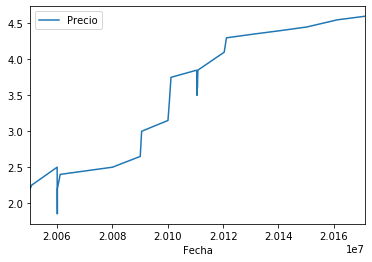

In [11]:
df_marca.plot('Fecha', 'Precio')

A continuació analitzem l'evolució de les vendes de cigarrets en milions de quantitat de caixes de 20 unitats. S'observa una davallada del consum indicativa de que les alçades de preu sí han tingut un impacte sobre el consum de tabac.

In [13]:
# Analitzem l'evolució de les vendes en unitats i preu
df_vendes = pd.read_csv('TabacoVentas.csv', sep=';')

def serie_vendes(df_vendes, labor, unitat):
    df_series = df_vendes[(df_vendes.Unidad==unitat) & (df_vendes.Labor==labor)]
    df_series = df_series.groupby('Anyo').sum()
    return df_series.reset_index('Anyo').reindex(columns=['Anyo', 'Total'])

df_vendes_cig = serie_vendes(df_vendes, 'CIGARRILLOS', 'cantidad')
df_vendes_cig

,Anyo,Total
0,2005,4634976813
1,2006,4504878823
2,2007,4455138244
3,2008,4514441345
4,2009,4067825486
5,2010,3621537558
6,2011,3015433434
7,2012,2671732721
8,2013,2375413218
9,2014,2339948159


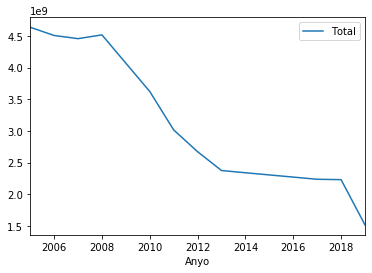

In [5]:
df_vendes_cig.plot('Anyo', 'Total')

Finalment analitzarem l'evolució de la recaptació en milions d'euros de les vendes de cigarrets. Observem que a pessar de la disminució del consum, la recaptació no ha baixat. Inclús en alguns anys ha augmentat fins a arribar al màxim de 1200 milions en 2010. Això es degut a les pujades de preu, la major part dels quals són impostos.

In [16]:
df_vendes_cig_eur = serie_vendes(df_vendes, 'CIGARRILLOS', 'euros')
df_vendes_cig_eur

,Anyo,Total
0,2005,10243642367
1,2006,10153788039
2,2007,11147599475
3,2008,11671980826
4,2009,11719616562
5,2010,12061477095
6,2011,11339721817
7,2012,10799877505
8,2013,10217072767
9,2014,10236958471


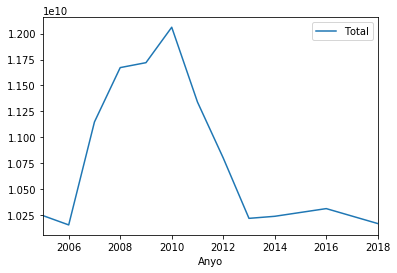

In [17]:
df_vendes_cig_eur.plot('Anyo', 'Total')